<a href="https://colab.research.google.com/github/lukyg/Customer_Churn_Classification/blob/master/customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Studi Case : *Customer Churn*

Perkembangan industri telekomunikasi yang pesat mempengaruhi perilaku masyarakat dalam menggunakan internet untuk berkomunikasi. Sehingga menyebabkan banyaknya perusahaan telekomunikasi dan meningkatnya service provider yang menimbulkan persaingan antar provider. Di sisi lain pengguna memiliki hak dalam memilih provider yang sesuai dan beralih dari provider sebelumnya yang diartikan sebagai **Customer Churn**. Peralihan ini menyebabkan berkurangnya pendapatan perusahaan telekomunikasi sehingga perlu ditangani. Dengan demikian, untuk mengatasi permasalahan tersebut dibuat sistem yang **melakukan prediksi costumer churn** agar dapat memetakan strategi bisnis untuk mempertahankan pelanggan.

## Data Overview (Rangkuman Data)

Dalam mengerjakan proyek ini, kami memiliki dua buah dataset yakni data latih dan data validasi. Berdasarkan dataset yang diberikan berasal dari Amerika Serikat karena adanya kolom `state`. Untuk pengertian kolom lainnya dapat dilihat pada tabel berikut.

| **Kolom**                           | **Deskripsi**                                                                                     |
|-------------------------------------|---------------------------------------------------------------------------------------------------|
| `state`                             | Kode negara bagian atau wilayah tempat pelanggan tinggal.                                         |
| `account_length`                    | Umur akun pelanggan dalam bulan.                                                                |
| `area_code`                         | Kode area telepon pelanggan.                                                                       |
| `international_plan`                | Apakah pelanggan berlangganan paket internasional (iya/tidak).                                        |
| `voice_mail_plan`                   | Apakah pelanggan berlangganan paket pesan suara (iya/tidak).                                          |
| `number_vmail_messages`             | Jumlah pesan suara yang diterima oleh pelanggan.                                                   |
| `total_day_minutes`                 | Total menit panggilan telepon pada siang hari.                                                     |
| `total_day_calls`                   | Total jumlah panggilan telepon pada siang hari.                                                    |
| `total_day_charge`                  | Total biaya panggilan telepon pada siang hari.                                                     |
| `total_eve_minutes`                 | Total menit panggilan telepon pada malam hari.                                                     |
| `total_eve_calls`                   | Total jumlah panggilan telepon pada malam hari.                                                    |
| `total_eve_charge`                  | Total biaya panggilan telepon pada malam hari.                                                     |
| `total_night_minutes`               | Total menit panggilan telepon pada malam hari.                                                     |
| `total_night_calls`                 | Total jumlah panggilan telepon pada malam hari.                                                    |
| `total_night_charge`                | Total biaya panggilan telepon pada malam hari.                                                     |
| `total_intl_minutes`                | Total menit panggilan telepon internasional.                                                       |
| `total_intl_calls`                  | Total jumlah panggilan telepon internasional.                                                      |
| `total_intl_charge`                 | Total biaya panggilan telepon internasional.                                                       |
| `number_customer_service_calls`     | Jumlah panggilan ke layanan pelanggan yang dilakukan oleh pelanggan.                              |
| `churn`                             | Status churn pelanggan (iya/tidak).                                                                   |


In [ ]:
#import library
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
import numpy as np

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

%matplotlib inline


warnings.filterwarnings('ignore')

In [ ]:
#Dataset untuk train dan test
url1 = "https://archive.org/download/data-train_202403/Data%20Train.csv"
dataset = pd.read_csv(url1)

In [ ]:
#Data untuk validasi
url2 = "https://archive.org/download/data-train_202403/Data%20Test.csv"
validation = pd.read_csv(url2)

In [ ]:
dataset.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [ ]:
validation.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [ ]:
dataset.shape

(4250, 20)

In [ ]:
validation.shape

(750, 20)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [ ]:
validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             750 non-null    int64  
 1   state                          750 non-null    object 
 2   account_length                 750 non-null    int64  
 3   area_code                      750 non-null    object 
 4   international_plan             750 non-null    object 
 5   voice_mail_plan                750 non-null    object 
 6   number_vmail_messages          750 non-null    int64  
 7   total_day_minutes              750 non-null    float64
 8   total_day_calls                750 non-null    int64  
 9   total_day_charge               750 non-null    float64
 10  total_eve_minutes              750 non-null    float64
 11  total_eve_calls                750 non-null    int64  
 12  total_eve_charge               750 non-null    flo

In [ ]:
dataset.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [ ]:
validation.isnull().sum()

id                               0
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
dtype: int64

Berdasarkan hasil ringkasan data, terdapat poin penting sebagai berikut:
*   Dataset latih memiliki 4250 baris data dengan 20 kolom, dimana salah satunya kolom 'churn' sebagai label. Sedangkan data validasi memiliki 750 baris data dengan 20 kolom tanpa kolom 'churn'.
*   Kedua dataset dalam kondisi baik dimana tidak terdapat terdapat null atau missing value.



## Exploratory Data Analysis (EDA)

### Descriptive Statistics

In [ ]:
dataset.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
account_length,4250.0,100.24,39.70,1.0,73.00,100.00,127.00,243.00
number_vmail_messages,4250.0,7.63,13.44,0.0,0.00,0.00,16.00,52.00
total_day_minutes,4250.0,180.26,54.01,0.0,143.33,180.45,216.20,351.50
total_day_calls,4250.0,99.91,19.85,0.0,87.00,100.00,113.00,165.00
total_day_charge,4250.0,30.64,9.18,0.0,24.36,30.68,36.75,59.76
total_eve_minutes,4250.0,200.17,50.25,0.0,165.92,200.70,233.78,359.30
total_eve_calls,4250.0,100.18,19.91,0.0,87.00,100.00,114.00,170.00
total_eve_charge,4250.0,17.02,4.27,0.0,14.10,17.06,19.87,30.54
total_night_minutes,4250.0,200.53,50.35,0.0,167.22,200.45,234.70,395.00
total_night_calls,4250.0,99.84,20.09,0.0,86.00,100.00,113.00,175.00


Dari hasil statistik deskriptif tersebut, didapatkan insight bahwa:
*   Terdapat 4 kategori panggilan yakni siang, sore, malam dan internasional.
*   Rata-rata panggilan dilakukan pada sore hari, namun dari jumlah panggilan terbanyak terjadi pada malam hari.
*   Namun, rata-rata biaya untuk panggilan tersebesar pada periode siang hari.
*   Demikian juga untuk rata-rata durasi yang digunakan untuk panggilan terbesar pada periode malam hari.











### Define Target Label

In [ ]:
import matplotlib.pyplot as plt

def pie_chart(column, title=None):
    converted_data = dataset[column].map({'no': 'no', 'yes': 'yes'})
    count = converted_data.value_counts()
    index = count.index
    value = count.values

    fig = plt.figure(figsize=(7, 7))
    plt.pie(value, labels=index, autopct='%1.1f%%', colors=['orange','dodgerblue'])

    if title:
        plt.title(title)

    plt.legend(index)
    plt.show()

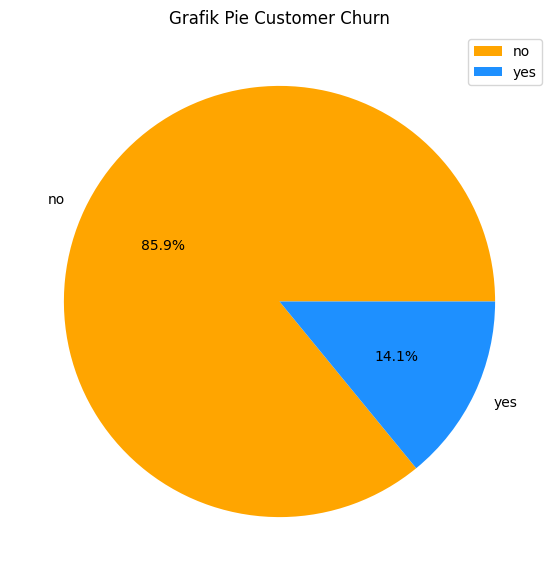

In [ ]:
pie_chart('churn', 'Grafik Pie Customer Churn')

Churn merupakan kolom yang menandai bahwa pelanggan berhenti menggunakan layanan. Dimana pada dataset ini terdapat 4250 record data yang mewakili jumlah pelanggan menggambarkan bahwa terdapat 3652 pelanggan tidak dalam kategori churn (masih berlangganan) dan 598 pelanggan dalam kategori churn (berhenti berlangganan).

Dengan demikian, bila digambar dalam bentuk diagram pie persentase pelanggan tidak dalam kategori churn sebesar 85.9% sedangkan pelanggan dalam ketegori churn sebesar 14.1%. Pada data ini sebagian besar pengguna cenderung menggunakan layanan sedangkan sebagian kecil beralih ke penyedia layanan lain.

### Data Cardinality Check

#### Categorical Data

In [ ]:
print(dataset.select_dtypes(include='object').nunique())

state                 51
area_code              3
international_plan     2
voice_mail_plan        2
churn                  2
dtype: int64


#### Numerical Data

In [ ]:
print(dataset.select_dtypes(exclude='object').nunique())

account_length                    215
number_vmail_messages              46
total_day_minutes                1843
total_day_calls                   120
total_day_charge                 1843
total_eve_minutes                1773
total_eve_calls                   123
total_eve_charge                 1572
total_night_minutes              1757
total_night_calls                 128
total_night_charge                992
total_intl_minutes                168
total_intl_calls                   21
total_intl_charge                 168
number_customer_service_calls      10
dtype: int64


Data Cardinality (Kardinalitas Data) mengacu pada keunikan nilai yang dimiliki oleh kolom pada tabel. Hal ini bertujuan untuk mengindentifikasi kolom-kolom tersebut memiliki keunikan yang tinggi atau rendah, khususnya saat proses modeling dapat menghindari terjadinya overfitting.

### Distribution Data Check

In [ ]:
for col in dataset.select_dtypes(include='object').columns.tolist():
  print('Distribusi nilai untuk fitur', col)
  print(dataset[col].value_counts(normalize=True)*100)
  print('\n')

Distribusi nilai untuk fitur state
state
WV    3.270588
MN    2.541176
ID    2.494118
AL    2.376471
VA    2.352941
OR    2.329412
TX    2.305882
UT    2.282353
NY    2.258824
NJ    2.258824
WY    2.235294
OH    2.235294
WI    2.211765
MA    2.094118
ME    2.094118
CT    2.070588
RI    2.047059
MI    2.047059
KS    2.047059
MD    2.023529
VT    2.023529
KY    2.000000
NV    1.952941
IN    1.952941
MS    1.929412
WA    1.882353
NC    1.882353
MO    1.882353
DE    1.882353
CO    1.882353
MT    1.882353
IL    1.858824
TN    1.858824
NM    1.835294
OK    1.835294
NH    1.835294
HI    1.811765
AZ    1.811765
FL    1.788235
SD    1.764706
NE    1.717647
DC    1.694118
SC    1.694118
AR    1.670588
LA    1.623529
PA    1.576471
ND    1.576471
GA    1.505882
IA    1.458824
AK    1.435294
CA    0.917647
Name: proportion, dtype: float64


Distribusi nilai untuk fitur area_code
area_code
area_code_415    49.600000
area_code_408    25.552941
area_code_510    24.847059
Name: proportion, dtype: floa

### Univariat Analysis

#### Categorical Data

In [ ]:
cat_col = dataset.select_dtypes(include=('object')).columns
print(cat_col)

Index(['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn'], dtype='object')


Index(['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn'], dtype='object')


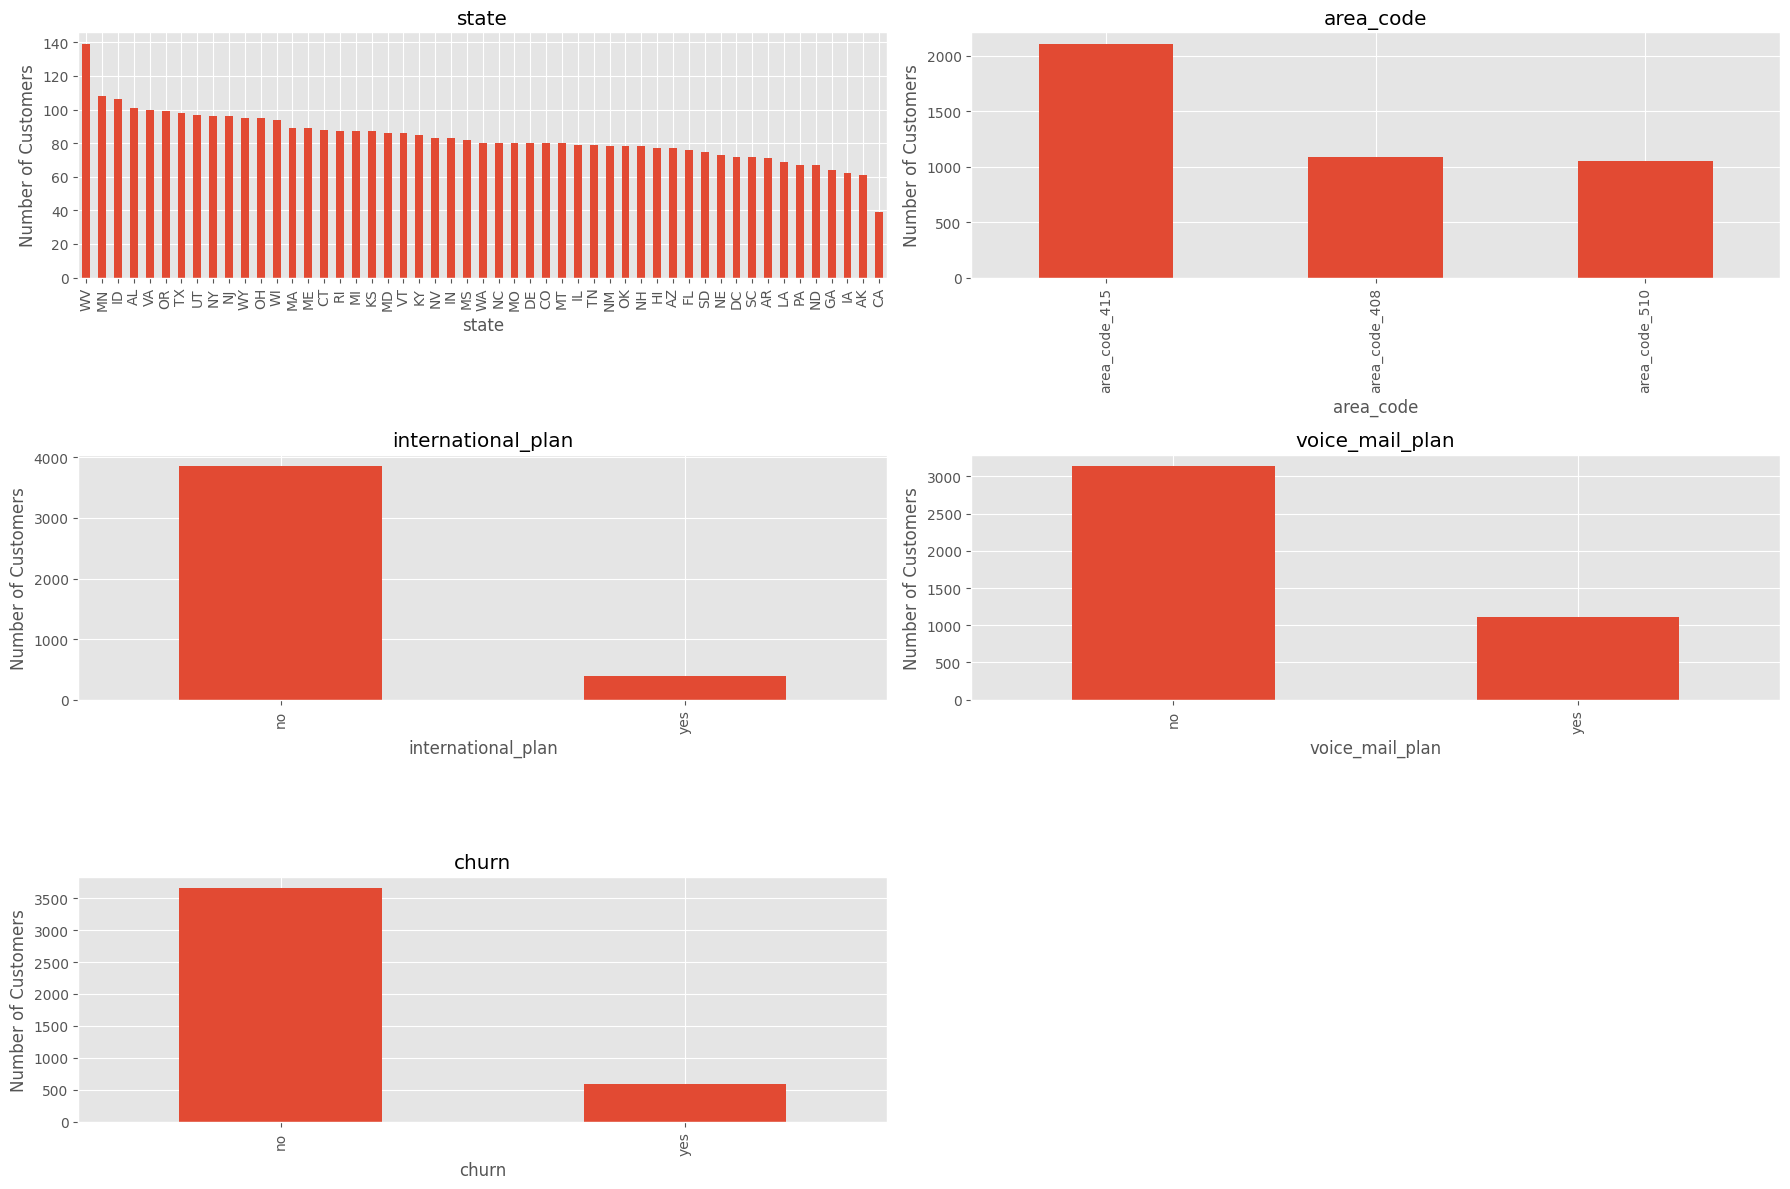

In [ ]:
print(cat_col)

plt.style.use('ggplot')

# number col and row for grid
n_cols = 2
n_rows = (len(cat_col) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

for idx, column in enumerate(cat_col):
    ax = axes[idx]
    dataset[column].value_counts().plot(kind='bar', ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel('Number of Customers')
    ax.set_title(column)

# Remove any empty subplots
for idx in range(len(cat_col), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

Univariat Analysis untuk kolom kategorik didapatkan sebagai berikut:
*   **state**: Pengguna layanan didominasi oleh pelanggan yang berasal dari negara bagian WV (West Virginia), sedangkan paling sedikit pengguna layanan berasal dadri negara bagian CA (California).
*   Sebagian besar pelanggan berada pada kode area 415.
*   Sebagian besar pelanggan tidak menggunakan paket internasional dan pesan suara.
*   Sebagian besar pelanggan masih berlangganan pada layanan yang diberikan.





#### Numerical Data

In [ ]:
num_col = dataset.select_dtypes(exclude=('object')).columns
print(num_col)

Index(['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls'],
      dtype='object')


Ringkasan Statistik account_length
Rata-rata :  100.24
Median :  100.00
Standar Deviasi :  39.70
Modus :  90


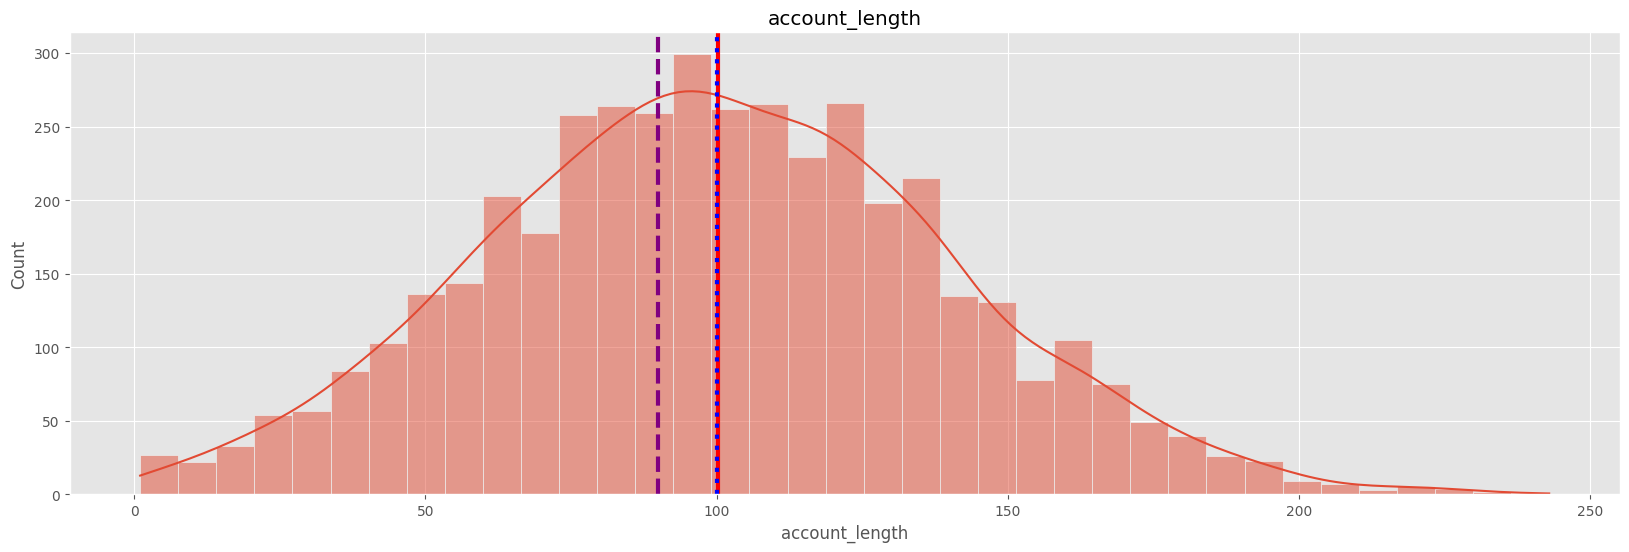



Ringkasan Statistik number_vmail_messages
Rata-rata :  7.63
Median :  0.00
Standar Deviasi :  13.44
Modus :  0


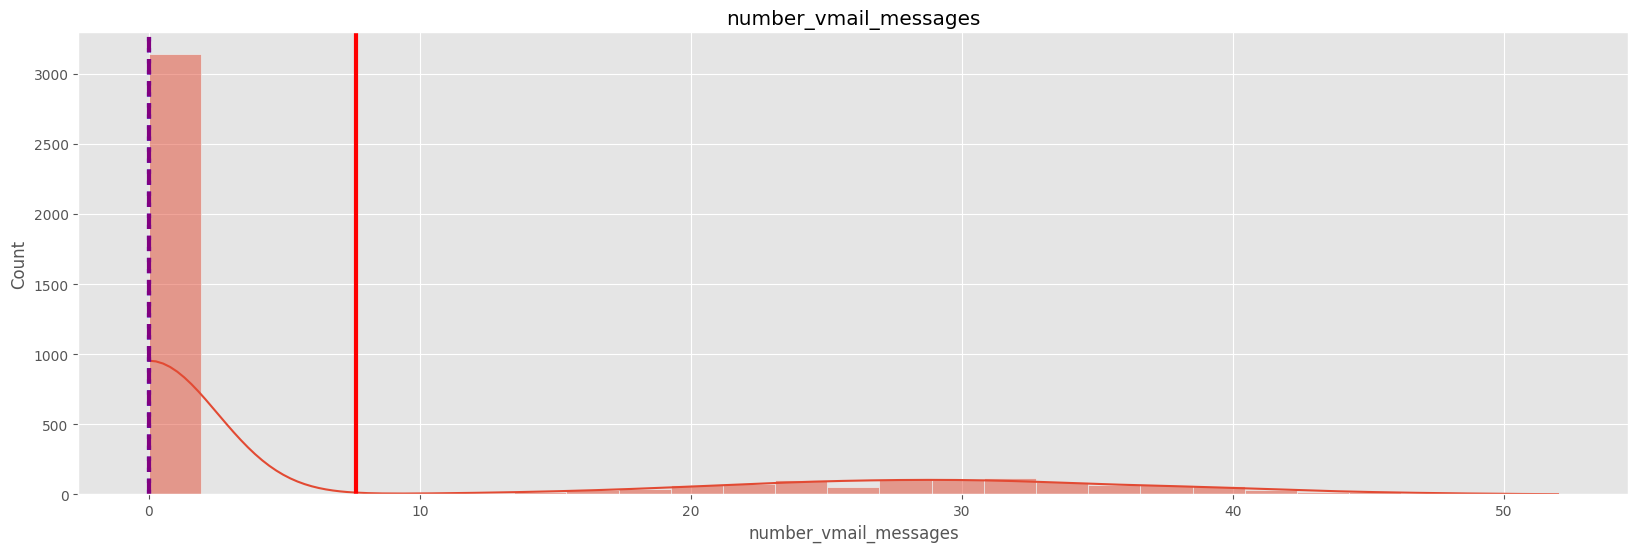



Ringkasan Statistik total_day_minutes
Rata-rata :  180.26
Median :  180.45
Standar Deviasi :  54.01
Modus :  189.3


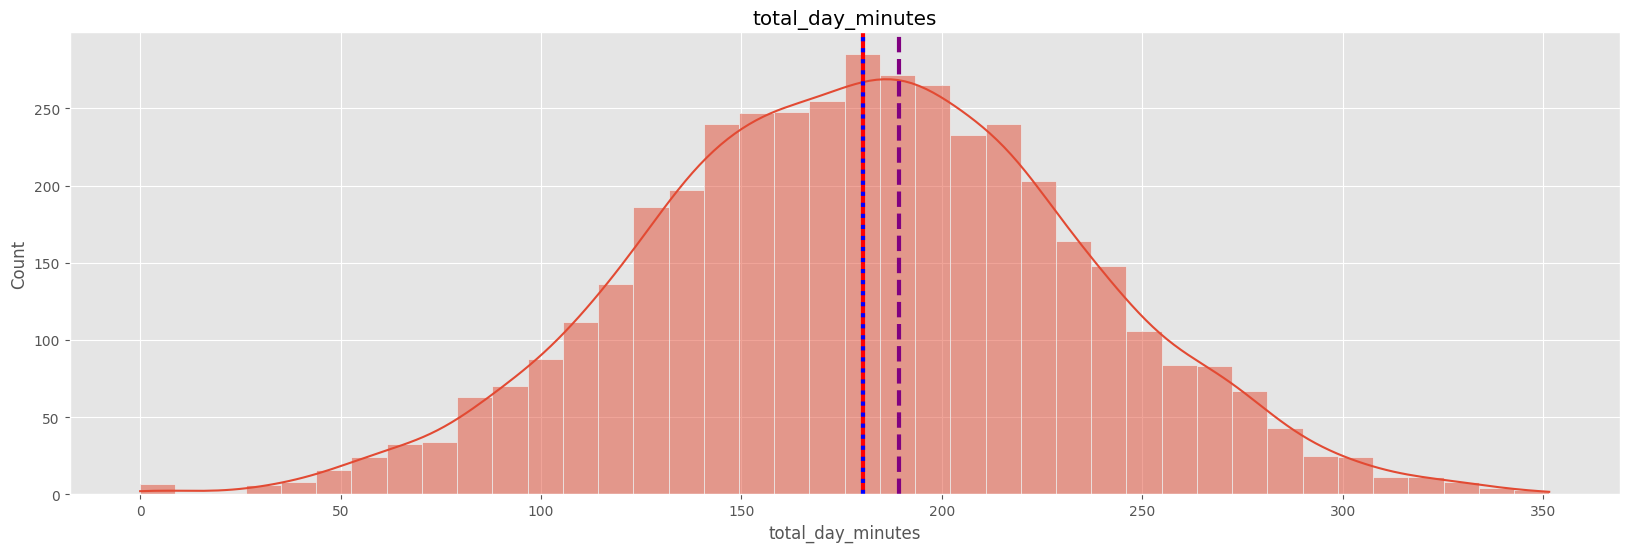



Ringkasan Statistik total_day_calls
Rata-rata :  99.91
Median :  100.00
Standar Deviasi :  19.85
Modus :  105


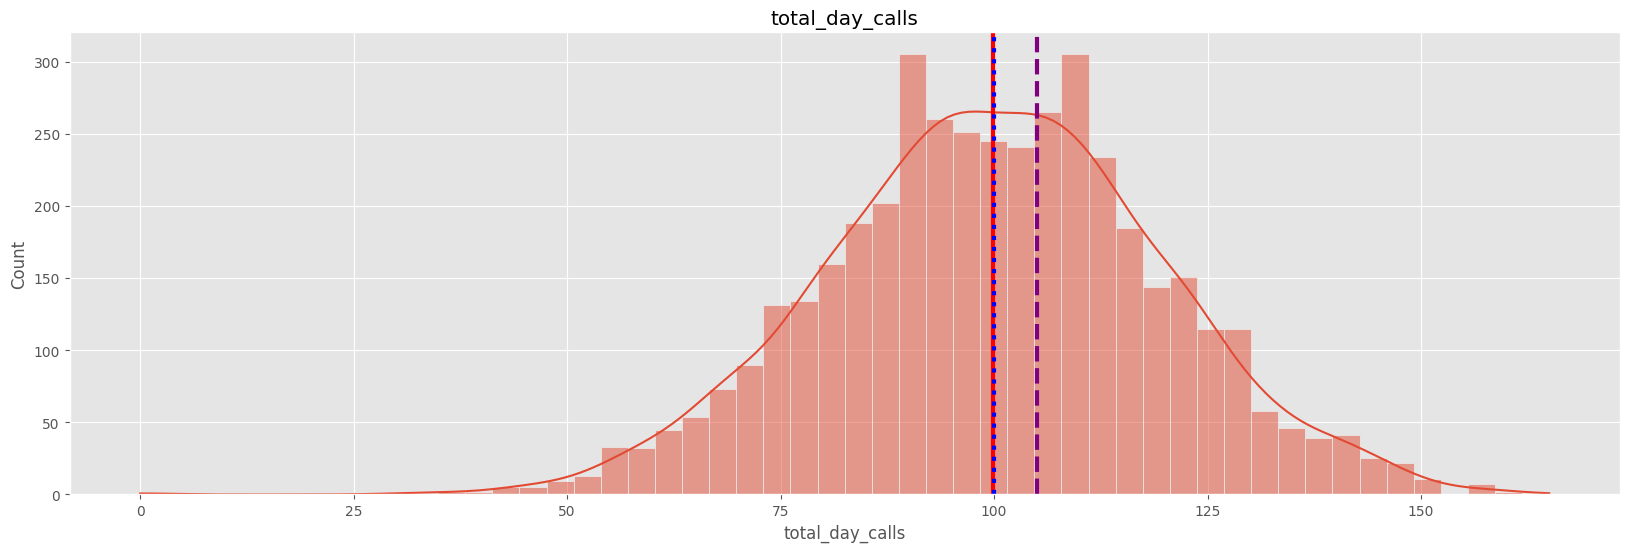



Ringkasan Statistik total_day_charge
Rata-rata :  30.64
Median :  30.68
Standar Deviasi :  9.18
Modus :  32.18


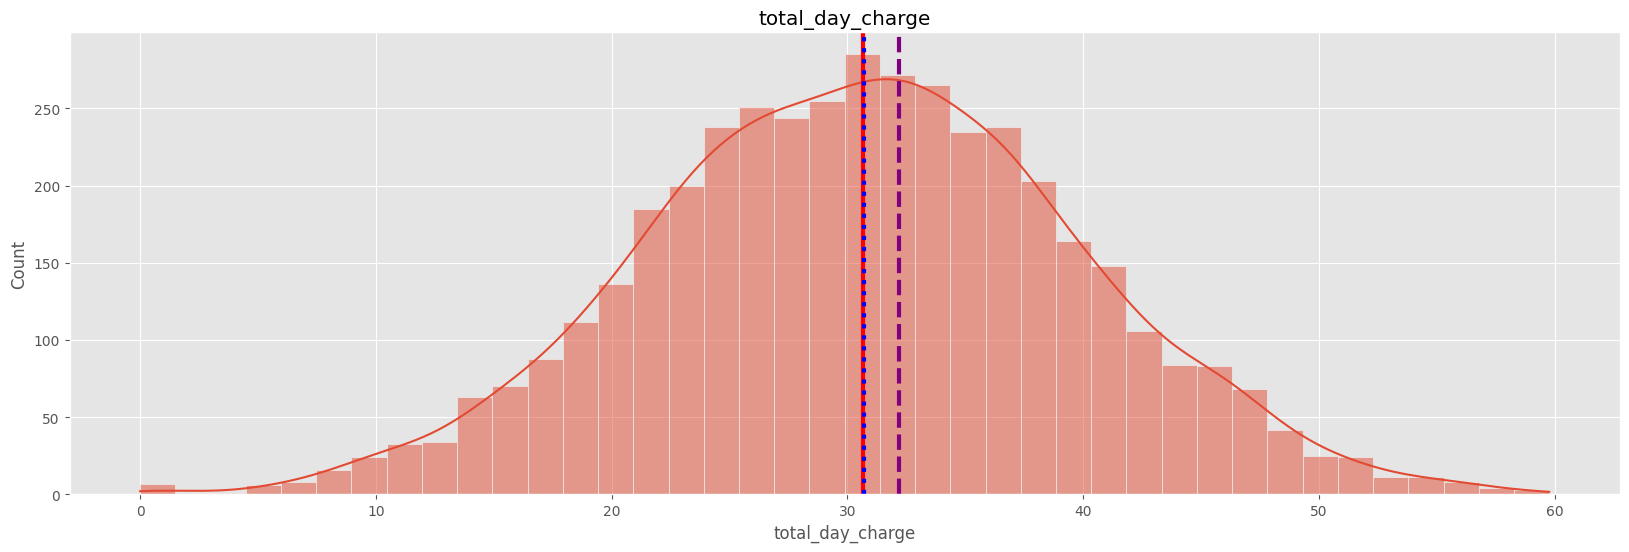



Ringkasan Statistik total_eve_minutes
Rata-rata :  200.17
Median :  200.70
Standar Deviasi :  50.25
Modus :  230.9


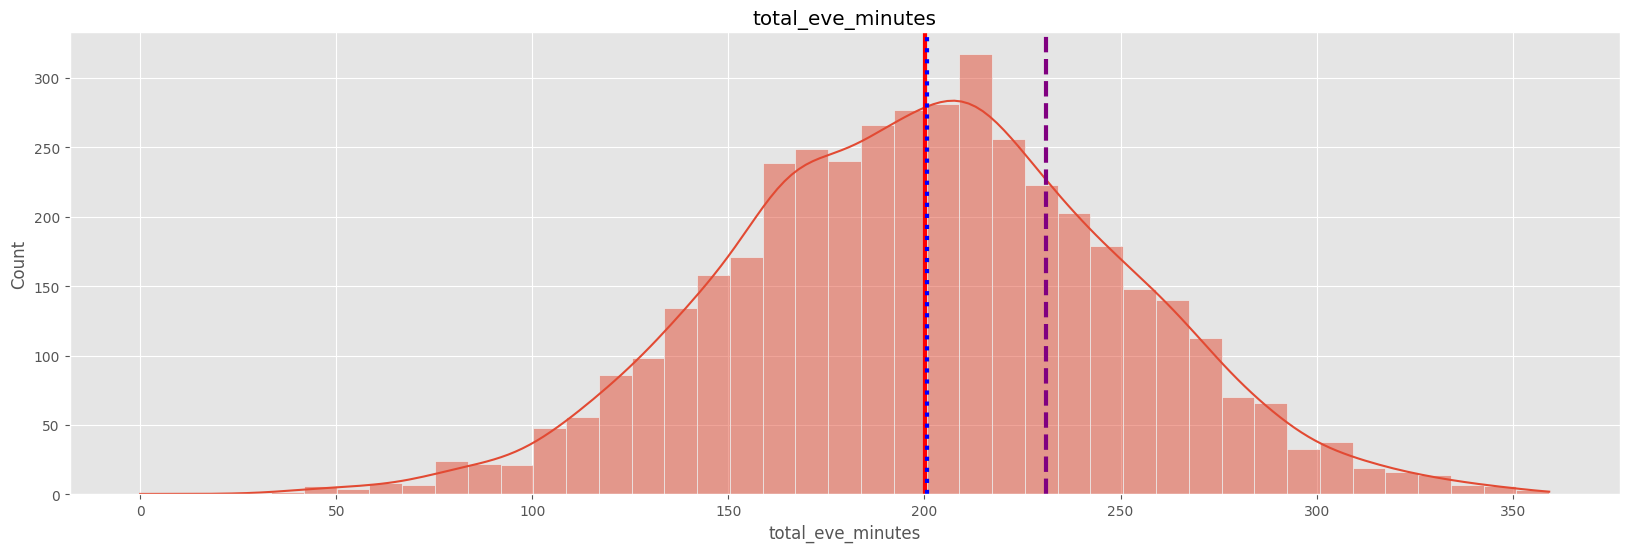



Ringkasan Statistik total_eve_calls
Rata-rata :  100.18
Median :  100.00
Standar Deviasi :  19.91
Modus :  105


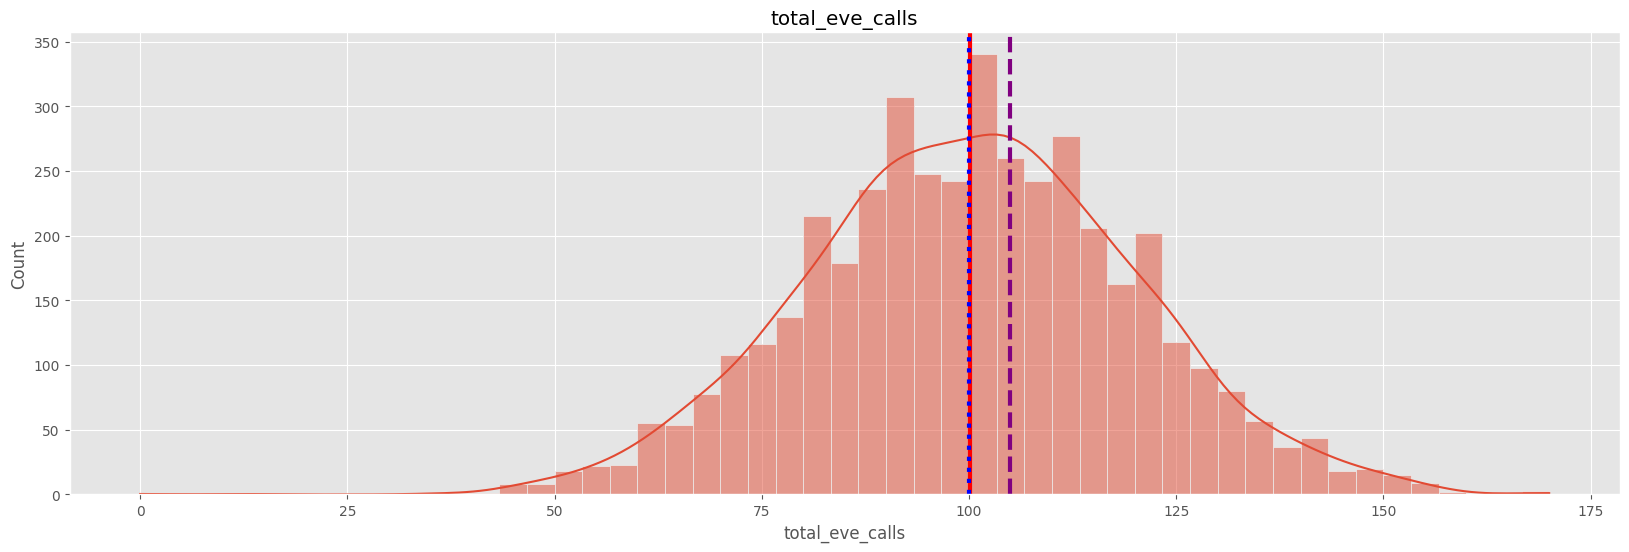



Ringkasan Statistik total_eve_charge
Rata-rata :  17.02
Median :  17.06
Standar Deviasi :  4.27
Modus :  14.25


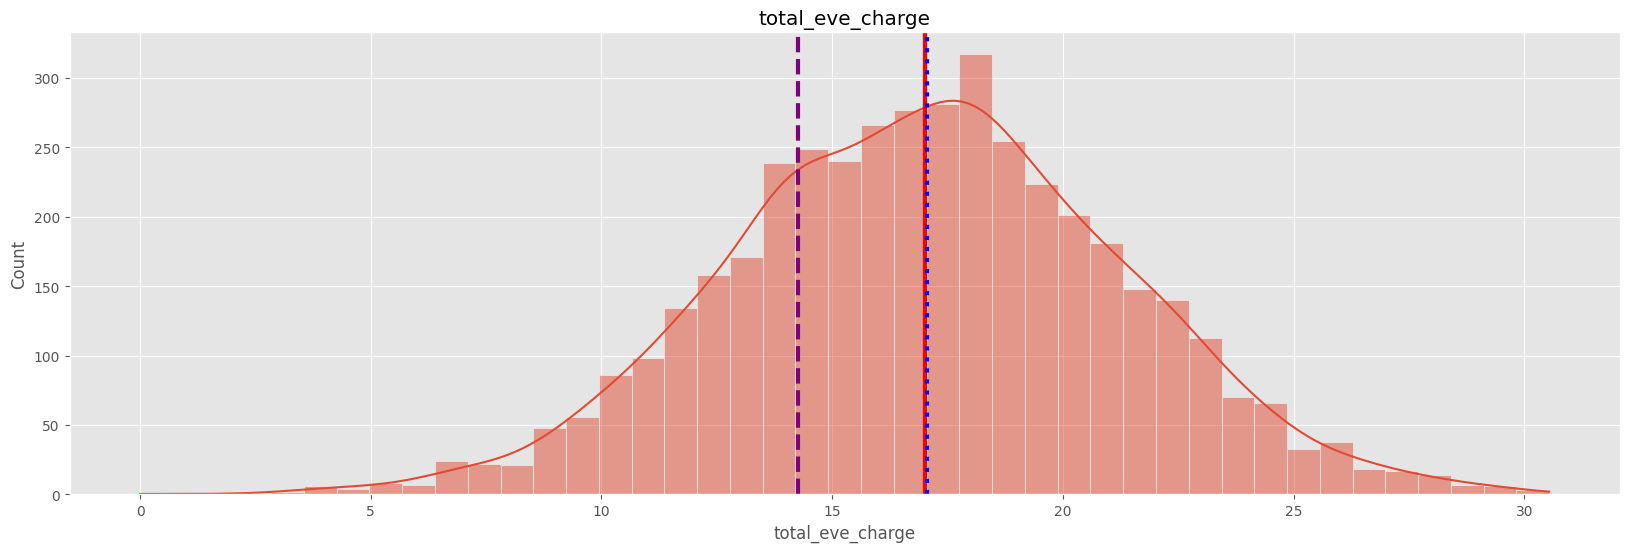



Ringkasan Statistik total_night_minutes
Rata-rata :  200.53
Median :  200.45
Standar Deviasi :  50.35
Modus :  186.2


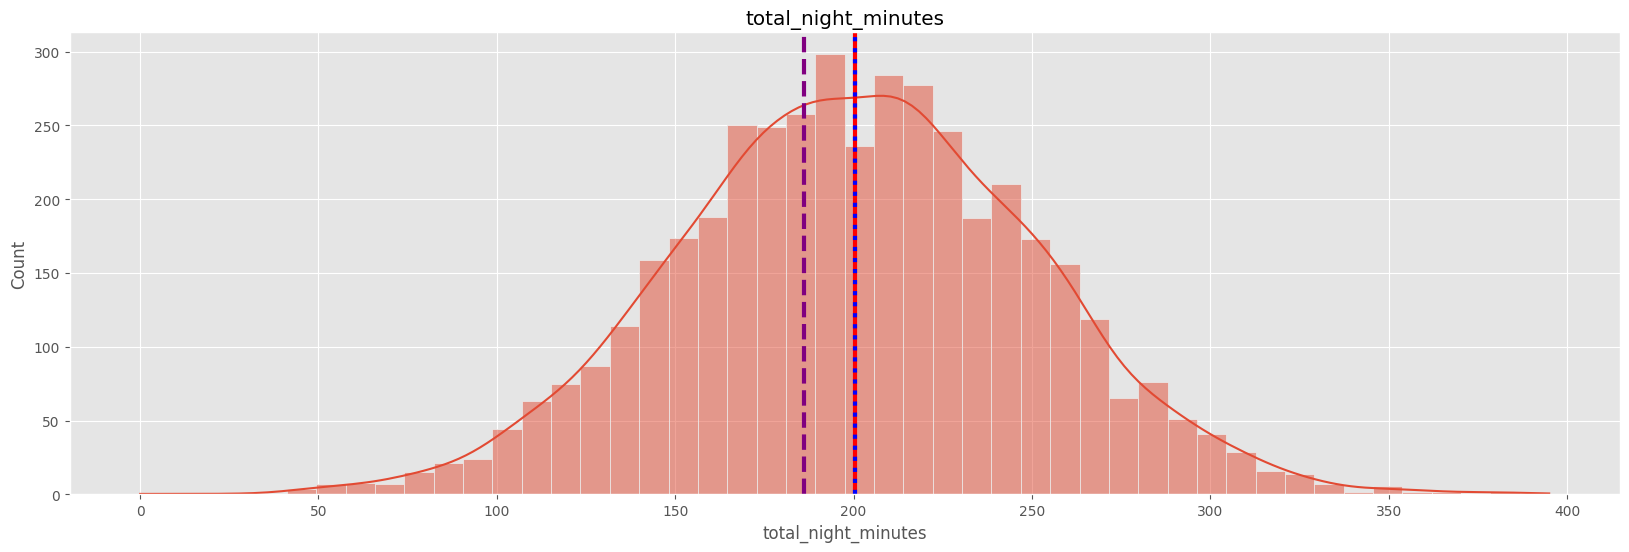



Ringkasan Statistik total_night_calls
Rata-rata :  99.84
Median :  100.00
Standar Deviasi :  20.09
Modus :  105


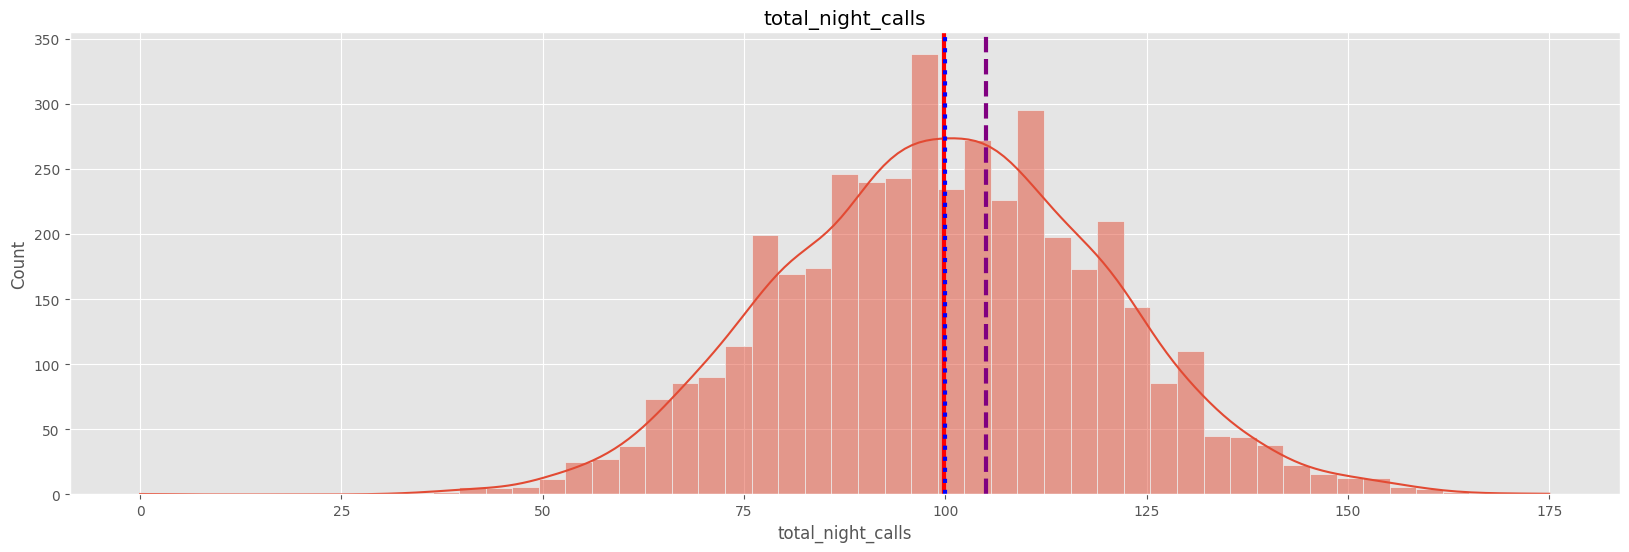



Ringkasan Statistik total_night_charge
Rata-rata :  9.02
Median :  9.02
Standar Deviasi :  2.27
Modus :  9.4


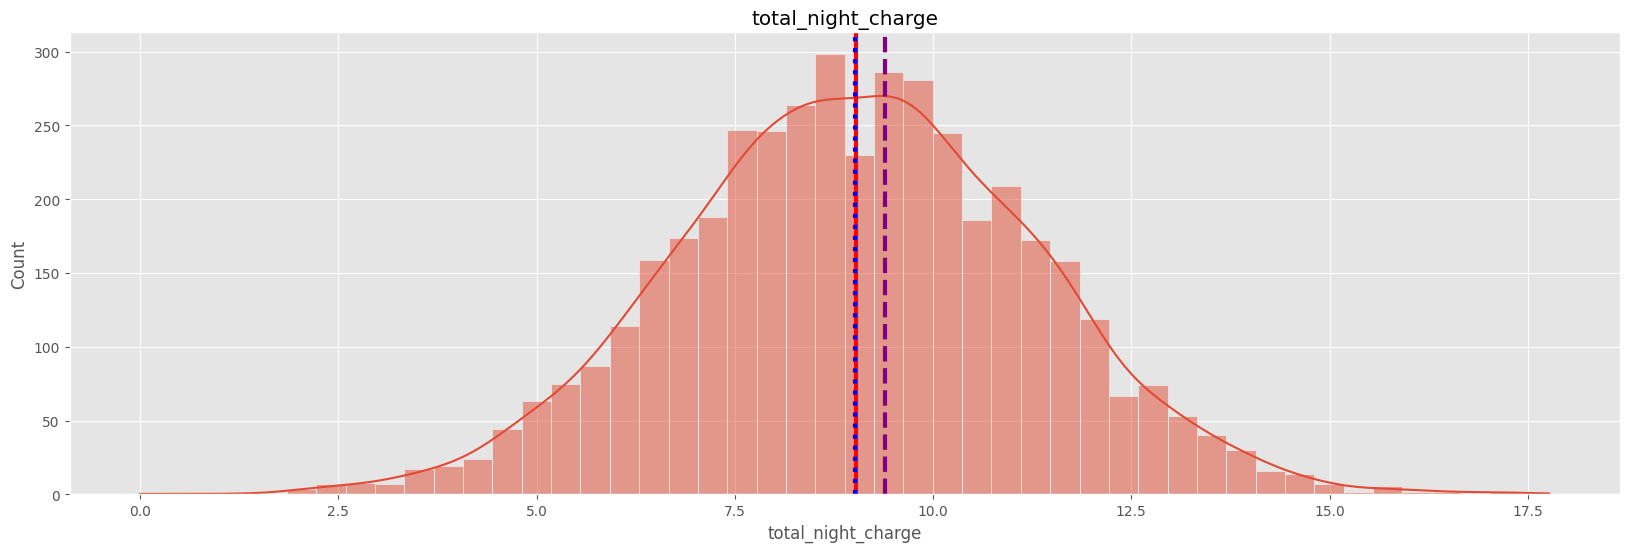



Ringkasan Statistik total_intl_minutes
Rata-rata :  10.26
Median :  10.30
Standar Deviasi :  2.76
Modus :  11.1


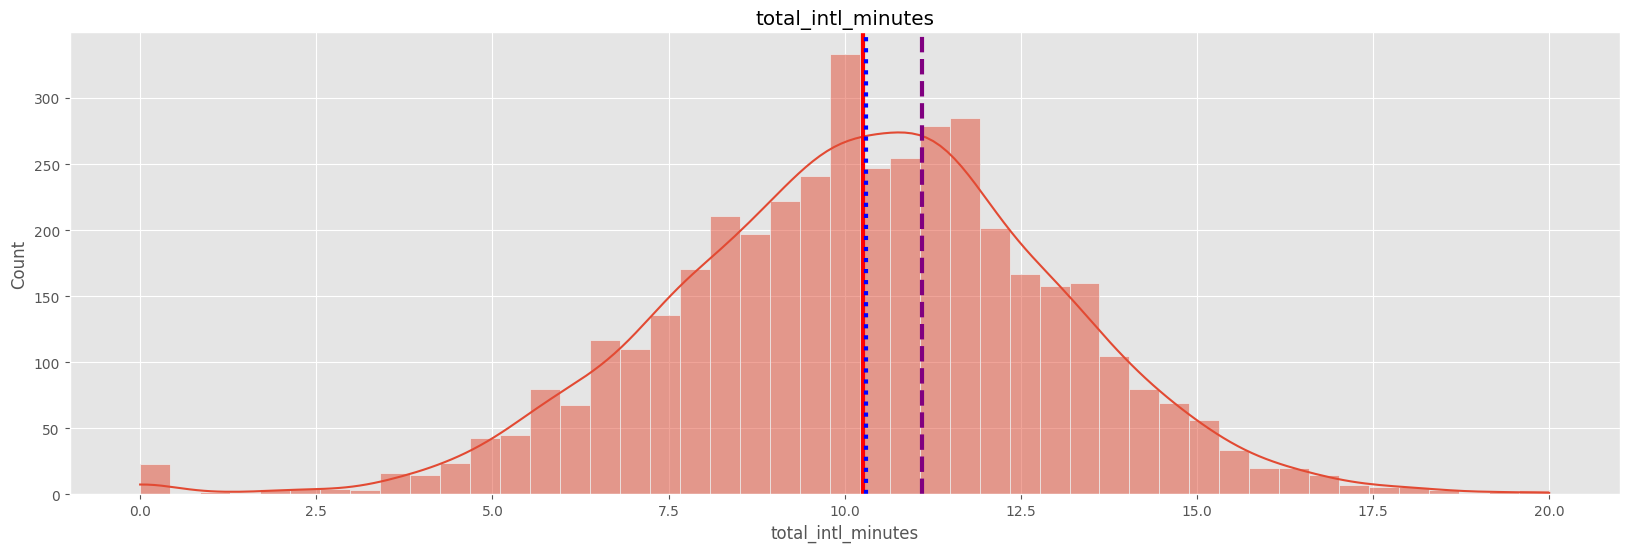



Ringkasan Statistik total_intl_calls
Rata-rata :  4.43
Median :  4.00
Standar Deviasi :  2.46
Modus :  3


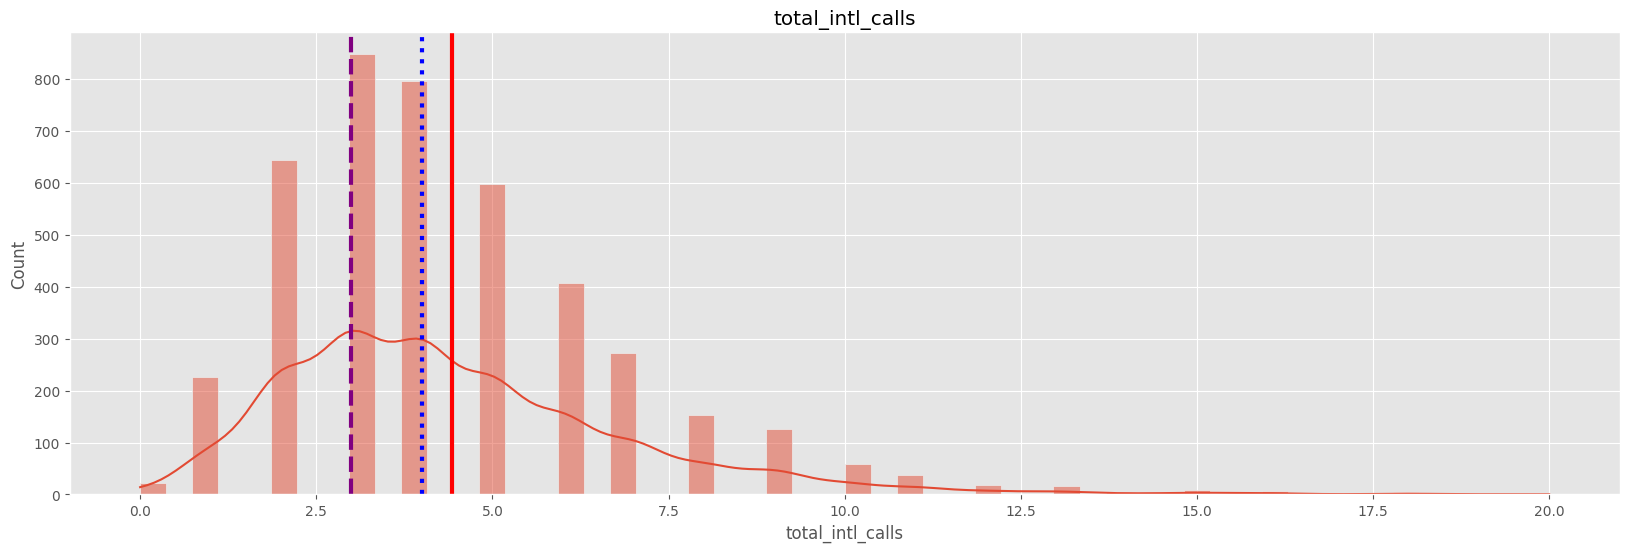



Ringkasan Statistik total_intl_charge
Rata-rata :  2.77
Median :  2.78
Standar Deviasi :  0.75
Modus :  3.0


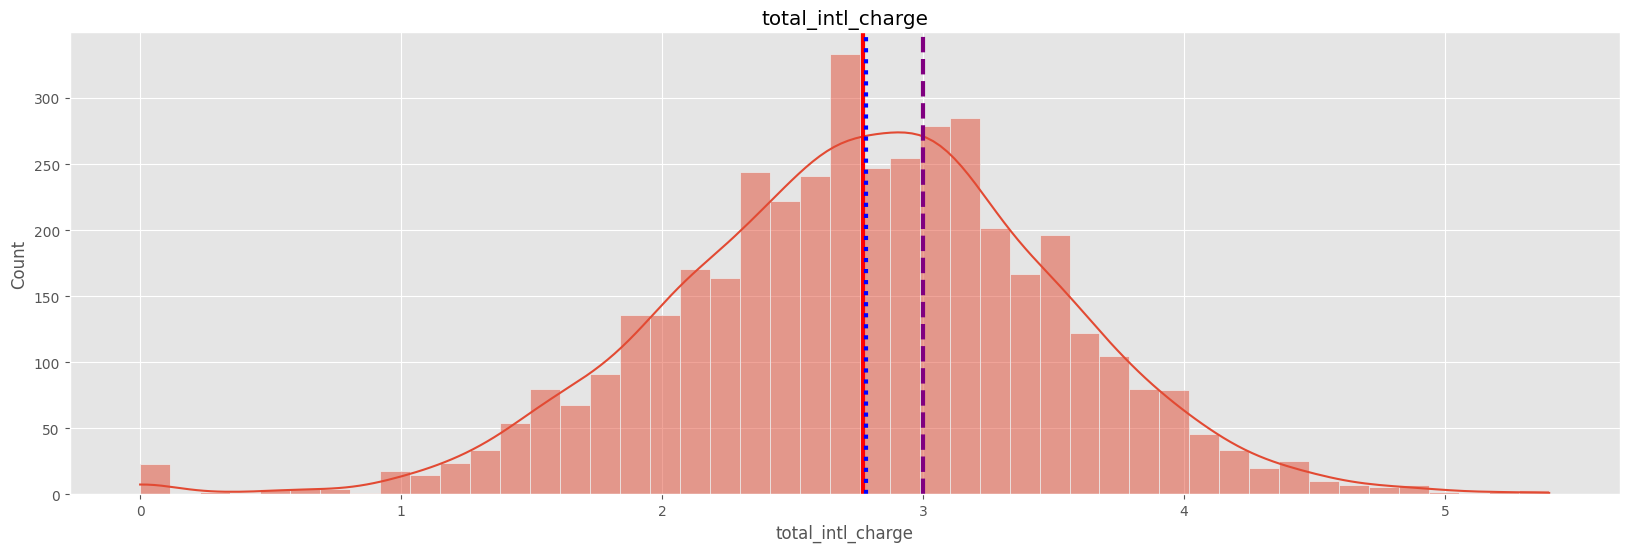



Ringkasan Statistik number_customer_service_calls
Rata-rata :  1.56
Median :  1.00
Standar Deviasi :  1.31
Modus :  1


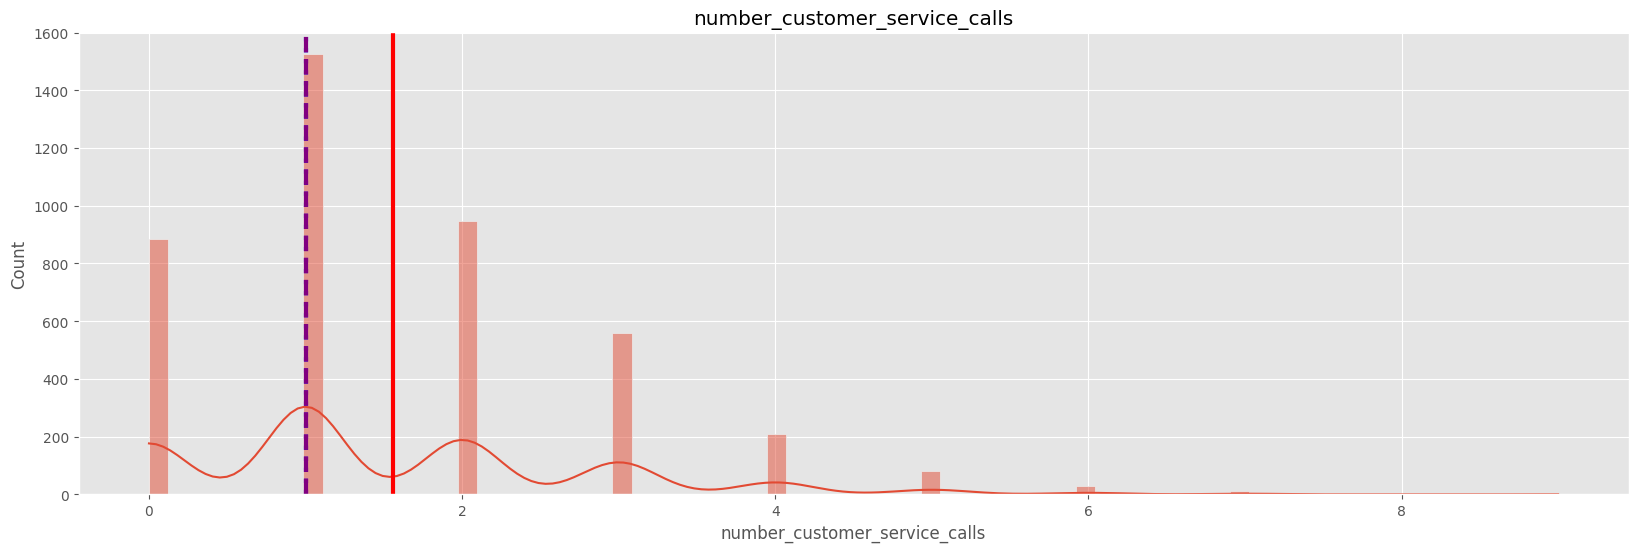

In [ ]:
plt.style.use('ggplot')
for column in dataset.select_dtypes(exclude='object').columns.tolist():
  #Menghitung statistik deskriptif
  avg = dataset[column].mean()
  med = dataset[column].median()
  mod = dataset[column].mode().iloc[0]
  std = dataset[column].std()

  #Menampilkan ringkasan statistik
  print('Ringkasan Statistik {columns}'.format(columns=column))
  print('Rata-rata : ', "%.2f" % avg)
  print('Median : ', "%.2f" % med)
  print('Standar Deviasi : ', "%.2f" % std)
  print('Modus : ', mod)

  #Membuat plot
  plt.figure(figsize=(20,6))
  sns.histplot(dataset[column], kde=True)
  plt.axvline(avg, color='red', linestyle='solid', linewidth=3, label='Mean')
  plt.axvline(med, color='blue', linestyle='dotted', linewidth=3, label='Median')
  plt.axvline(mod, color='purple', linestyle='dashed', linewidth=3, label='Mode')
  plt.title(column)

  plt.show()
  print('\n')

### Bivariat Analysis

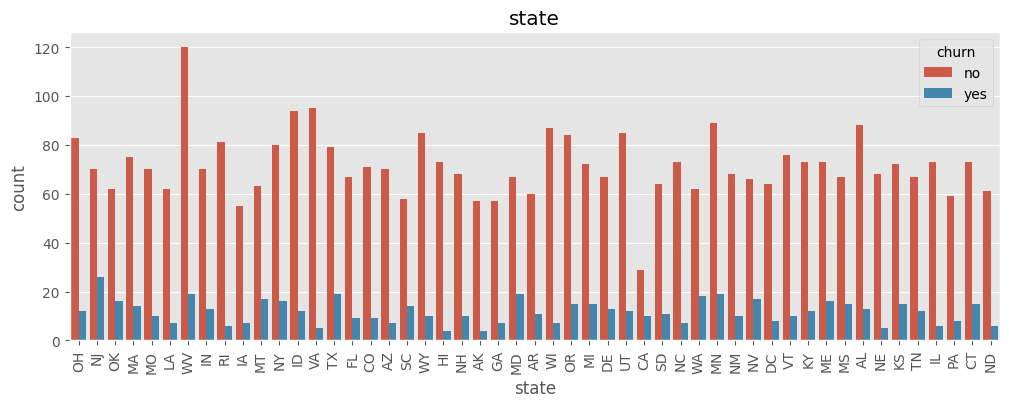

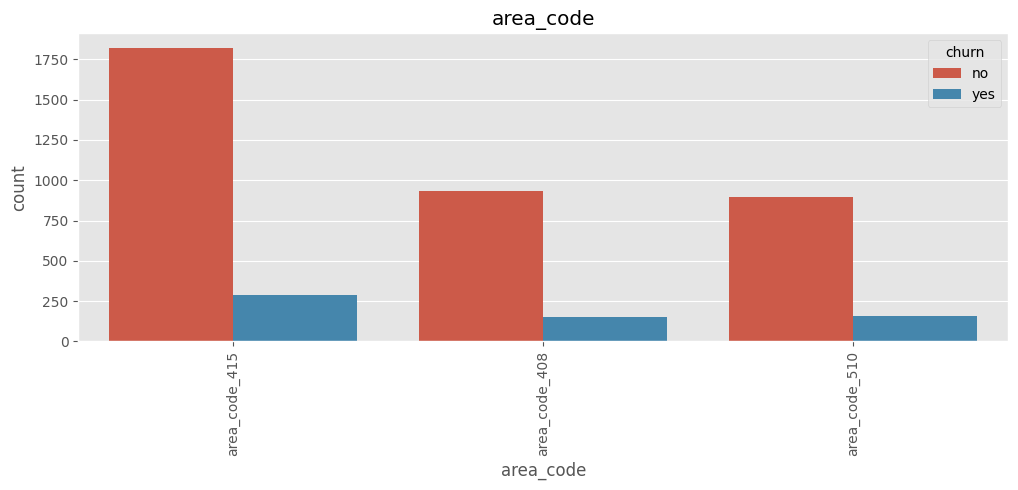

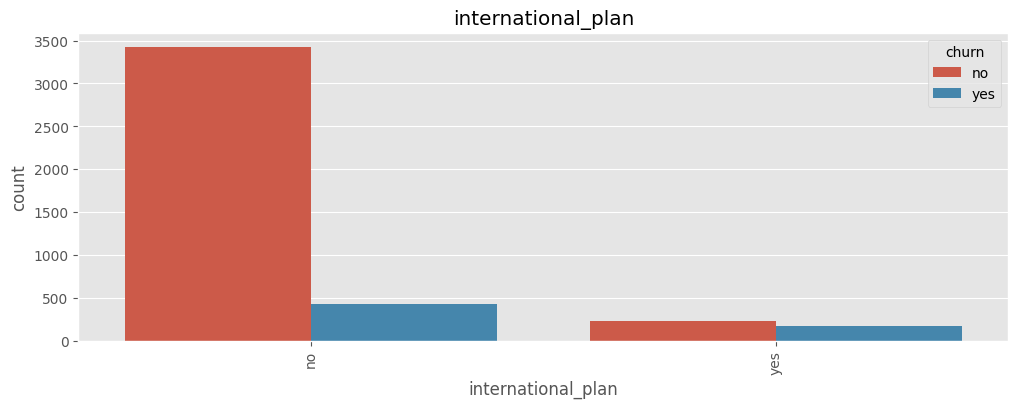

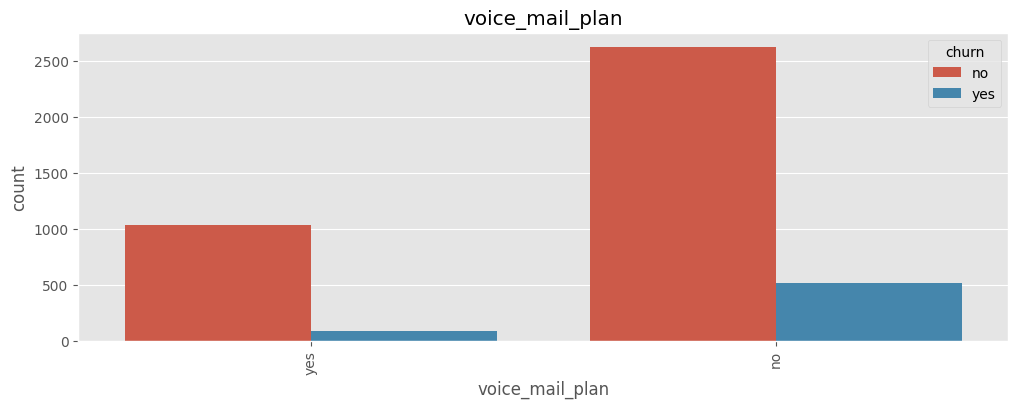

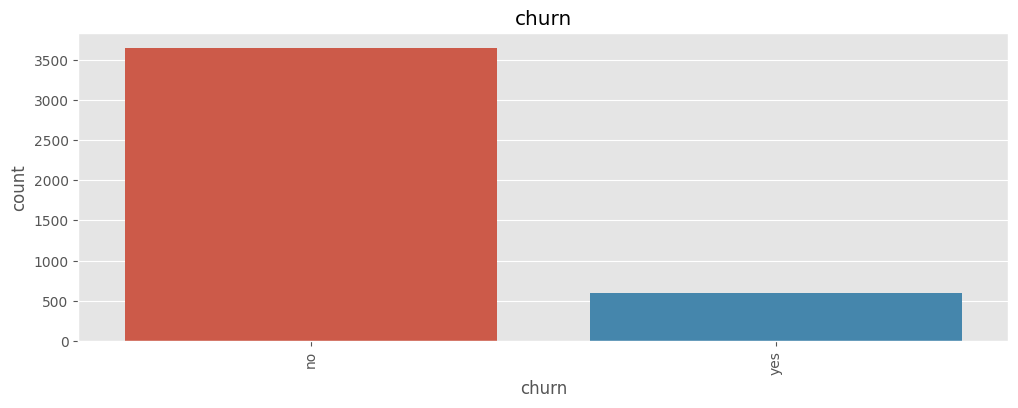

In [ ]:
plt.style.use('ggplot')
for column in cat_col:
  plt.figure(figsize=(12,4))
  sns.countplot(x=dataset[column], hue=dataset['churn'])
  plt.title(column)
  plt.xticks(rotation=90)

  plt.show()
  print('\n')

### Heatmap untuk Korelasi Variabel

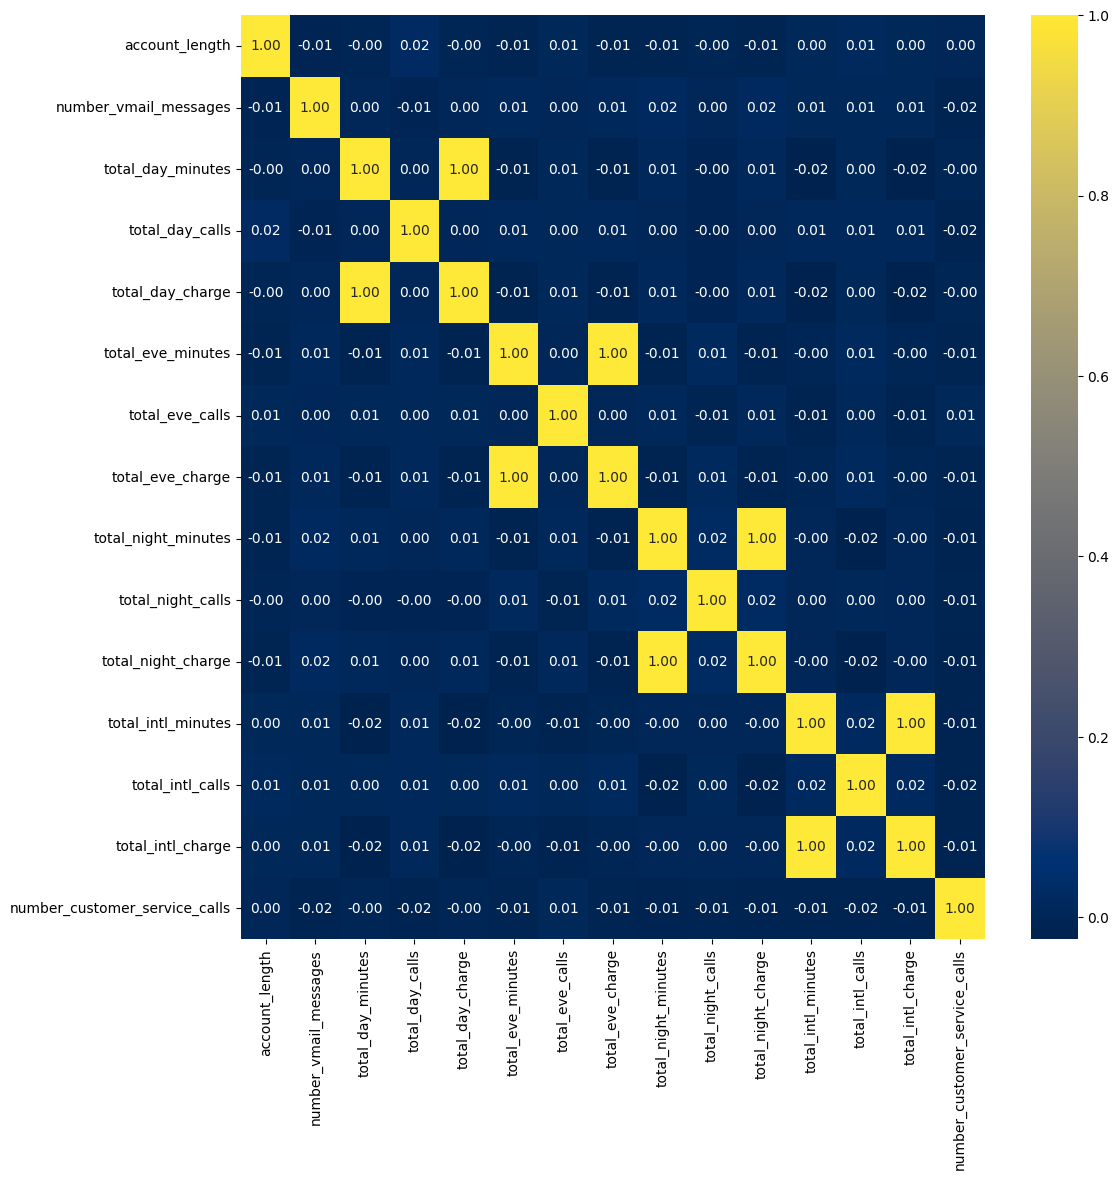

In [ ]:
corrMatrix = num_col.corr()
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrMatrix, annot=True, fmt=".2f", cmap="cividis")
plt.show()

Pada heatmap dapat diperhatikan bahwa beberapa variabel terlalu berkorelasi. Diantaranya total_day_minutes dengan total_day_charge, total_night_minutes dengan total_night_charge dan total_intl_minutes dengan total_intl_charge. Hasil ini dapat terjadi karena dependen variabel, sehingga tidak perlu untuk digunakan.

## Preprocessing (Pemrosesan Awal)

### Data Cleaning

#### Missing Value

In [ ]:
dataset.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [ ]:
validation.isnull().sum()

id                               0
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
dtype: int64

Setelah dilakukan pengecekan nilai null pada dataset, tidak terdapat nilai dan anomali.

#### Duplicate Data

In [ ]:
dataset.duplicated(dataset).value_counts()

False    4250
Name: count, dtype: int64

In [ ]:
validation.duplicated(validation).value_counts()

False    750
Name: count, dtype: int64

Pengecekan juga dilakukan pada nilai yang terduplikasi, didapatkan bahwa tidak terdapat nilai diplikat. Sehingga dapat dilanjutkan ke tahap selanjutnya.

### Feature Encode

In [ ]:
dataset['churn'] = dataset['churn'].map({'yes': 1, 'no': 0})
dataset['international_plan'] = dataset['international_plan'].map({'yes': 1, 'no': 0})
dataset['voice_mail_plan'] = dataset['voice_mail_plan'].map({'yes': 1, 'no': 0})

In [ ]:
dataset[['international_plan','voice_mail_plan','churn']]

,international_plan,voice_mail_plan,churn
0,0,1,0
1,0,0,0
2,1,0,0
3,1,0,0
4,0,1,0
...,...,...,...
4245,0,0,0
4246,0,0,0
4247,0,0,0
4248,0,1,0


In [ ]:
dataset

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,NJ,137,area_code_415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,OH,84,area_code_408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,OK,75,area_code_415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,MA,121,area_code_510,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,area_code_415,0,0,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,0
4246,WV,73,area_code_408,0,0,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,0
4247,NC,75,area_code_408,0,0,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,0
4248,HI,50,area_code_408,0,1,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,0


In [ ]:
validation['international_plan'] = validation['international_plan'].map({'yes': 1, 'no': 0})
validation['voice_mail_plan'] = validation['voice_mail_plan'].map({'yes': 1, 'no': 0})

In [ ]:
validation

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,0,0,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,0,0,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,0,0,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,746,GA,130,area_code_415,0,0,0,119.4,99,20.30,226.3,97,19.24,202.7,111,9.12,11.3,7,3.05,0
746,747,WA,73,area_code_408,0,0,0,177.2,118,30.12,270.5,84,22.99,241.8,112,10.88,12.3,2,3.32,3
747,748,WV,152,area_code_415,0,0,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3
748,749,DC,61,area_code_415,0,0,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1


Konversi data kategorik ke data numerik diperlukan agar karena sebagian besar algoritma pembelajaran mesin dan statistik memerlukan data yang dalam bentuk numerik untuk dapat dijalankan dengan baik. Pada studi kasus ini, konversi dilakukan baik pada dataset sebagai train dan test, maupun pada data validation sebagai bahan prediksi.

### Feature Selection

In [ ]:
dataset = dataset.drop(['number_vmail_messages','account_length','state', 'area_code', 'total_day_minutes', 'total_eve_minutes','total_night_minutes', 'total_intl_charge'], axis =1)
dataset

,international_plan,voice_mail_plan,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,number_customer_service_calls,churn
0,0,1,123,27.47,103,16.62,103,11.45,13.7,3,1,0
1,0,0,114,41.38,110,10.30,104,7.32,12.2,5,0,0
2,1,0,71,50.90,88,5.26,89,8.86,6.6,7,2,0
3,1,0,113,28.34,122,12.61,121,8.41,10.1,3,3,0
4,0,1,88,37.09,108,29.62,118,9.57,7.5,7,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4245,0,0,70,32.01,88,20.72,79,9.62,10.3,6,0,0
4246,0,0,89,30.24,82,11.15,89,8.38,11.5,6,3,0
4247,0,0,101,29.02,126,16.41,104,5.81,6.9,7,1,0
4248,0,1,127,40.07,126,18.96,116,13.39,9.9,5,2,0


In [ ]:
validation = validation.drop(['id','number_vmail_messages','account_length','state', 'area_code', 'total_day_minutes', 'total_eve_minutes','total_night_minutes', 'total_intl_charge'], axis =1)
validation

,international_plan,voice_mail_plan,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,number_customer_service_calls
0,0,1,110,45.07,99,16.78,91,11.01,10.0,3,1
1,1,0,98,37.98,101,18.75,118,9.18,6.3,6,0
2,0,0,70,20.52,76,26.11,99,9.14,13.1,6,4
3,0,0,114,32.42,111,18.55,121,5.83,8.1,3,3
4,0,0,76,21.13,112,23.55,115,11.28,15.5,5,3
...,...,...,...,...,...,...,...,...,...,...,...
745,0,0,99,20.30,97,19.24,111,9.12,11.3,7,0
746,0,0,118,30.12,84,22.99,112,10.88,12.3,2,3
747,0,0,90,31.31,73,21.83,113,9.61,14.7,2,3
748,0,0,89,23.90,128,14.69,97,9.56,13.6,4,1


Selain itu juga dilakukan proses drop column untuk memilah variabel yang akan digunakan maupun tidak. Proses ini dilakukan pada dataset dan data validation dengan tujuan untuk mengurangi fitur agar lebih cepat dalam proses pelatihan.

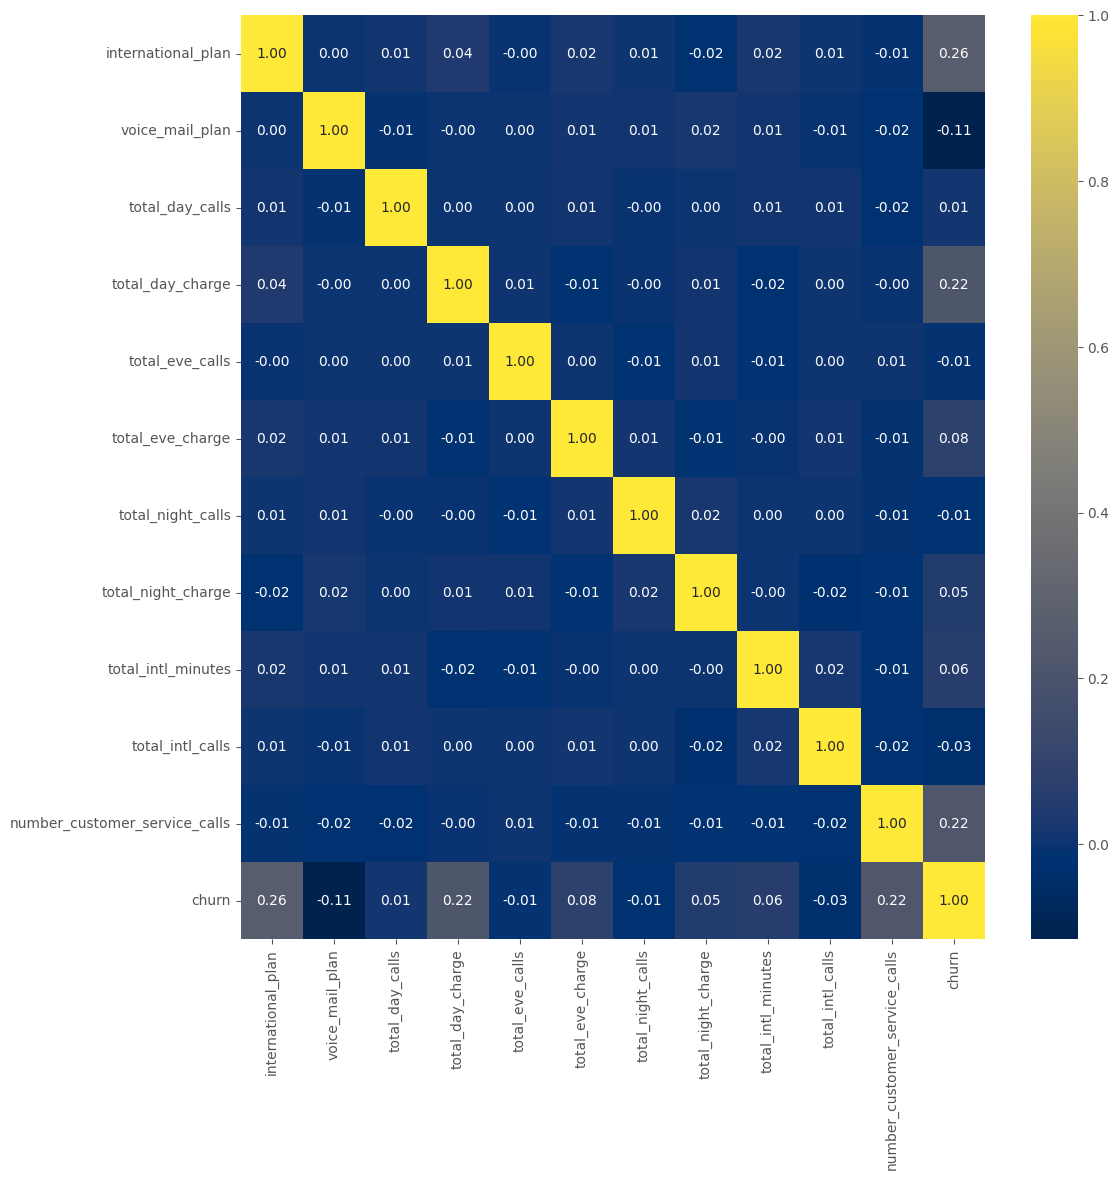

In [ ]:
corrMatrix = dataset.corr()
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrMatrix, annot=True, fmt=".2f", cmap="cividis")
plt.show()

Dari heatmap tersebut dapat dilihat bahwa variabel yang digunakan sebagai fitur merupakan variabel independen dan sudah menghilangkan variabel yang dependen.

### Standardization dan Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

dataset['total_day_calls'] = MinMaxScaler().fit_transform(dataset['total_day_calls'].values.reshape(len(dataset), 1))
dataset['total_eve_calls'] = MinMaxScaler().fit_transform(dataset['total_eve_calls'].values.reshape(len(dataset), 1))
dataset['total_night_calls'] = MinMaxScaler().fit_transform(dataset['total_night_calls'].values.reshape(len(dataset), 1))
dataset['total_intl_calls'] = MinMaxScaler().fit_transform(dataset['total_intl_calls'].values.reshape(len(dataset), 1))

dataset['total_day_charge'] = StandardScaler().fit_transform(dataset['total_day_charge'].values.reshape(len(dataset), 1))
dataset['total_eve_charge'] = StandardScaler().fit_transform(dataset['total_eve_charge'].values.reshape(len(dataset), 1))
dataset['total_night_charge'] = StandardScaler().fit_transform(dataset['total_night_charge'].values.reshape(len(dataset), 1))
dataset['total_intl_minutes'] = StandardScaler().fit_transform(dataset['total_intl_minutes'].values.reshape(len(dataset), 1))

validation['total_day_calls'] = MinMaxScaler().fit_transform(validation['total_day_calls'].values.reshape(len(validation), 1))
validation['total_eve_calls'] = MinMaxScaler().fit_transform(validation['total_eve_calls'].values.reshape(len(validation), 1))
validation['total_night_calls'] = MinMaxScaler().fit_transform(validation['total_night_calls'].values.reshape(len(validation), 1))
validation['total_intl_calls'] = MinMaxScaler().fit_transform(validation['total_intl_calls'].values.reshape(len(validation), 1))

validation['total_day_charge'] = StandardScaler().fit_transform(validation['total_day_charge'].values.reshape(len(validation), 1))
validation['total_eve_charge'] = StandardScaler().fit_transform(validation['total_eve_charge'].values.reshape(len(validation), 1))
validation['total_night_charge'] = StandardScaler().fit_transform(validation['total_night_charge'].values.reshape(len(validation), 1))
validation['total_intl_minutes'] = StandardScaler().fit_transform(validation['total_intl_minutes'].values.reshape(len(validation), 1))

Normalization dilakukan agar distribusi pada kolom yang belum terdistribusi dengan baik dapat dinormalkan, penggunaan normalization juga didasarkan pada algoritma yang akan digunakan pada proses prediksi.

### Outliers

#### Z-Score

In [ ]:
from scipy import stats
import numpy as np

print(f'Jumlah baris sebelum memfilter outlier: {len(dataset)}')

filtered_entries = np.array([True] * len(dataset))
for col in ['international_plan', 'voice_mail_plan', 'total_day_calls',
            'total_day_charge', 'total_eve_calls', 'total_eve_charge', 'total_night_calls',
            'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'number_customer_service_calls']:
    zscore = abs(stats.zscore(dataset[col]))
    filtered_entries = (zscore < 3) & filtered_entries

dataset_outlier = dataset[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(dataset_outlier)}')

Jumlah baris sebelum memfilter outlier: 4250
Jumlah baris setelah memfilter outlier: 3671


In [ ]:
dataset_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3671 entries, 0 to 4248
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   international_plan             3671 non-null   int64  
 1   voice_mail_plan                3671 non-null   int64  
 2   total_day_calls                3671 non-null   float64
 3   total_day_charge               3671 non-null   float64
 4   total_eve_calls                3671 non-null   float64
 5   total_eve_charge               3671 non-null   float64
 6   total_night_calls              3671 non-null   float64
 7   total_night_charge             3671 non-null   float64
 8   total_intl_minutes             3671 non-null   float64
 9   total_intl_calls               3671 non-null   float64
 10  number_customer_service_calls  3671 non-null   int64  
 11  churn                          3671 non-null   int64  
dtypes: float64(8), int64(4)
memory usage: 372.8 KB


Untuk menghilangkan outlier, kami menggunakan z-score yang digunakan untuk menormalisasi data dan mengidentifikasi outlier. Sehingga terlihat bahwa jumlah baris data sebelum dan sesudah dilakukan normalisasi. Jumlah sebelum yaitu 4250 baris data dan sesudah yaitu 3671 baris data.

In [ ]:
X = dataset_outlier.drop(['churn'], axis=1)
y = dataset_outlier['churn']

### Data Rebalancing (SMOTE)

In [ ]:
from collections import Counter

print(Counter(y))

Counter({0: 3278, 1: 393})


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=123)
X,y = smote.fit_resample(X,y)
print(Counter(y))

Counter({0: 3278, 1: 3278})


Metode SMOTE dengan oversampling digunakan untuk membuat dataset yang digunakan untuk proses modeling menjadi lebih seimbang. Hal ini dilakukan agar mengurangi terjadinya overfitting.

## Modeling (Pembuatan Model)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

Dataset akan terbagi dengan rasio 0.7 sebagai data train dan 0.3 sebagai data test. Dimana data tersebut akan dilakukan proses train dan test dengan 3 model yaitu KNN, Decision Tree dan Random Forest. Masing-masing model dilakukan hyperparameter tunning dengan metode GridSearchCV.

#### Algoritma KNN

In [ ]:
param_grid_knn = {'n_neighbors':[1,3,5,7,9,11,13,15]}

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Parameter terbaik:", grid_search.best_params_)

best_knn = grid_search.best_estimator_

y_pred_knn = best_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(classification_report(y_test,y_pred_knn))

Parameter terbaik: {'n_neighbors': 1}
              precision    recall  f1-score   support

           0       0.98      0.89      0.93       987
           1       0.90      0.98      0.94       980

    accuracy                           0.93      1967
   macro avg       0.94      0.93      0.93      1967
weighted avg       0.94      0.93      0.93      1967



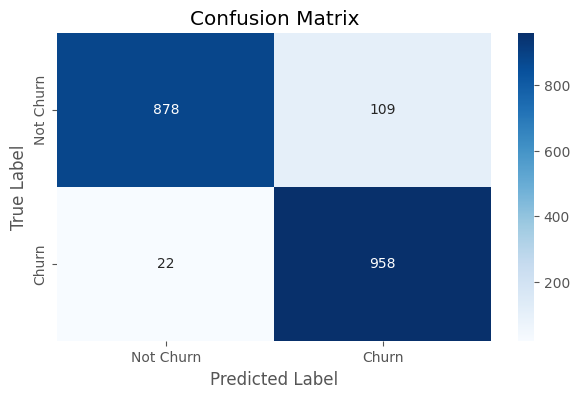

In [ ]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(7, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Churn', 'Churn'],
            yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

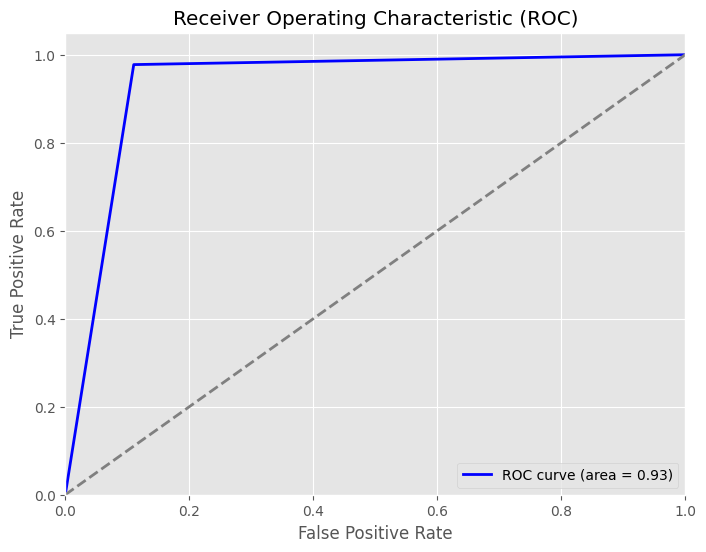

In [ ]:
# ROC Curve
y_proba_knn = best_knn.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba_knn)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

#### Algoritma Decision Tree

In [ ]:
param_grid_dcs = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dcs_tree = DecisionTreeClassifier()

grid_search = GridSearchCV(dcs_tree, param_grid_dcs, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Parameter terbaik:", grid_search.best_params_)

best_dcs_tree = grid_search.best_estimator_

y_pred_dcs = best_dcs_tree.predict(X_test)
accuracy_dcs_tree = accuracy_score(y_test, y_pred_dcs)
print(classification_report(y_test,y_pred_dcs))

Parameter terbaik: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.89      0.96      0.93       987
           1       0.96      0.88      0.92       980

    accuracy                           0.92      1967
   macro avg       0.93      0.92      0.92      1967
weighted avg       0.93      0.92      0.92      1967



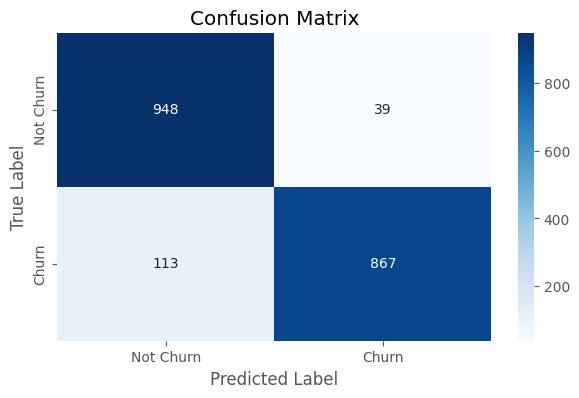

In [ ]:
cm_dcs = confusion_matrix(y_test, y_pred_dcs)
plt.figure(figsize=(7, 4))
sns.heatmap(cm_dcs, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Churn', 'Churn'],
            yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

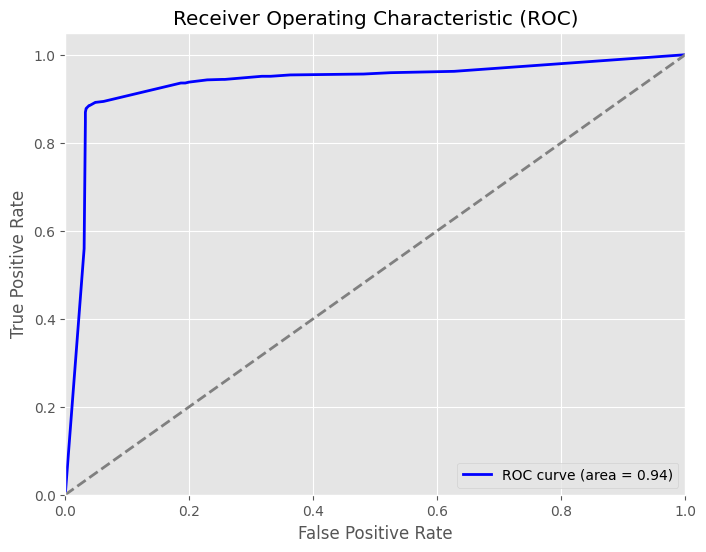

In [ ]:
# ROC Curve
y_proba_dcs = best_dcs_tree.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba_dcs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

#### Algoritma Logistic Regression

In [ ]:
param_grid_logreg = {
    'C': [0.0001, 0.001, 0.01, 0.1],
    'penalty' : ['l1', 'l2', 'elasticnet', None],

}

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

grid_search = GridSearchCV(logreg, param_grid_logreg , cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Parameter terbaik:", grid_search.best_params_)

best_logreg = grid_search.best_estimator_

y_pred_logreg = best_logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(classification_report(y_test,y_pred_logreg))

Parameter terbaik: {'C': 0.1, 'penalty': 'l2'}
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       987
           1       0.76      0.82      0.79       980

    accuracy                           0.78      1967
   macro avg       0.79      0.78      0.78      1967
weighted avg       0.79      0.78      0.78      1967



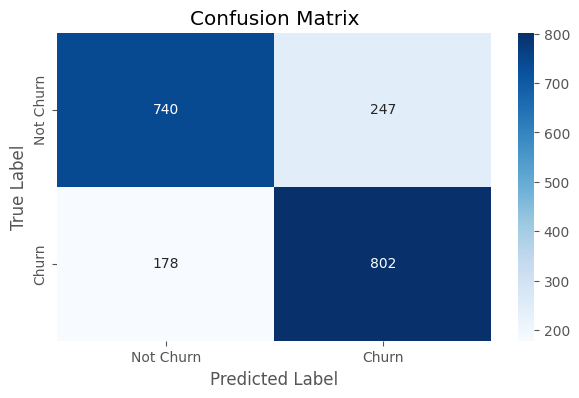

In [ ]:
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(7, 4))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Churn', 'Churn'],
            yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

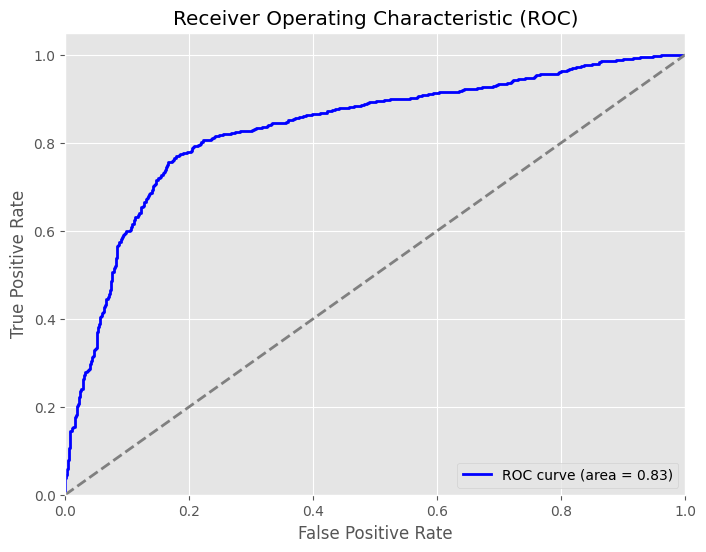

In [ ]:
# ROC Curve
y_proba_logreg = best_logreg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba_logreg)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

## Model Prediction (Prediksi Model)

In [ ]:
#prediksi knn
knn_predik = best_knn.predict(validation)
print(knn_predik)
counts = np.bincount(knn_predik)
print("\nJumlah pelanggan tidak churn (0):", counts[0])
print("Jumlah pelanggan churn (1)", counts[1])

[0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0
 1 1 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1
 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 

In [ ]:
#prediksi decision tree
dcs_tree_predik = best_dcs_tree.predict(validation)
print(dcs_tree_predik)
counts = np.bincount(dcs_tree_predik)
print("\nJumlah pelanggan tidak churn (0):", counts[0])
print("Jumlah pelanggan churn (1)", counts[1])

[0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 1 0 1 1 1 0 1 0 0 1 1 1 1 0
 1 1 1 0 0 1 1 0 0 0 1 0 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0
 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0
 0 1 0 1 0 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 1 0 0
 1 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 1 1 0 1 1 1 0 0 1 0 1 1 0
 0 1 1 0 1 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1
 1 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 1 0 0 0 1 0 0 1 0 1 0 0
 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 0 0 1 1
 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 1
 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1
 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0
 0 0 1 1 1 0 1 1 0 0 0 1 

In [ ]:
#prediksi logistic regression
logreg_predik = best_logreg.predict(validation)
print(logreg_predik)
counts = np.bincount(logreg_predik)
print("\nJumlah pelanggan tidak churn (0):", counts[0])
print("Jumlah pelanggan churn (1)", counts[1])

[0 0 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0
 1 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 1
 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0
 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0
 0 1 0 1 0 0 1 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0
 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0
 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0
 0 0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1
 1 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0
 0 1 0 0 1 0 0 0 0 0 0 1 

## Hasil dan Rekomendasi

Berdasarkan analisa yang dilakukan, dirumuskan beberapa rekomendasi berikut:
*   Panggilan terbanyak dilakukan di malam hari, sehingga perlu dilakukan pemberian paket dan promosi agar tetap mempertahankan pelanggan.
*   Peningkatan pelayanan perlu dilakukan pada pelanggan yang memiliki paket internasional, karena sebagian besar pelanggan dengan paket internasional berhenti berlangganan pada layanan provider.
*   Negara bagian California (CA) menjadi daerah dengan pelanggan terendah, sehingga terdapat potensi untuk meningkatkan pelayanan pada daerah tersebut.
*   Negara bagian New Jersey menjadi daerah dengan jumlah churn tertinggi dari negara bagian yang lain.





| Model              | Akurasi | Precision | Recall | F1-Score | ROC-AUC | Hasil Uji Churn | Hasil Uji Tidak Churn |
|--------------------|---------|-----------|--------|----------|---------|-----------------|-----------------------|
| KNN                | 0.78    | 0.79      | 0.78   | 0.78     | 0.93    | 608             | 142                   |
| Decision Tree      | 0.92    | 0.93      | 0.92   | 0.92     | 0.94    | 420             | 330                   |
| Logistic Regression| 0.78    | 0.79      | 0.78   | 0.78     | 0.83    | 517             | 233                   |


Dengan akurasi, Precision, Recall, dan F1-Score tertinggi serta ROC-AUC yang baik, Decision Tree adalah model terbaik untuk prediksi churn. Model ini dapat membantu dalam mengidentifikasi pelanggan yang berisiko tinggi untuk churn dan memberikan wawasan yang mendalam tentang faktor-faktor yang mempengaruhi churn.
